<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [69]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-19 09:18:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  67.5MB/s    in 3.0s    

2025-04-19 09:18:14 (67.5 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [70]:
!pip install pandas

In [71]:
!pip install matplotlib

In [72]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [16]:
print(df['CompTotal'].describe())
print(df['CompTotal'].sort_values(ascending=False).head(10))
df = df[df['CompTotal'] < 1e7]  # Adjust this based on your dataset
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]


count    3.273300e+04
mean     3.857888e+05
std      9.351785e+05
min      0.000000e+00
25%      5.740000e+04
50%      1.030000e+05
75%      2.200000e+05
max      9.912000e+06
Name: CompTotal, dtype: float64
10117    9912000.0
10864    9864000.0
39225    9800000.0
6880     9800000.0
16138    9700000.0
23963    9600000.0
24466    9600000.0
33248    9600000.0
13309    9600000.0
59010    9600000.0
Name: CompTotal, dtype: float64


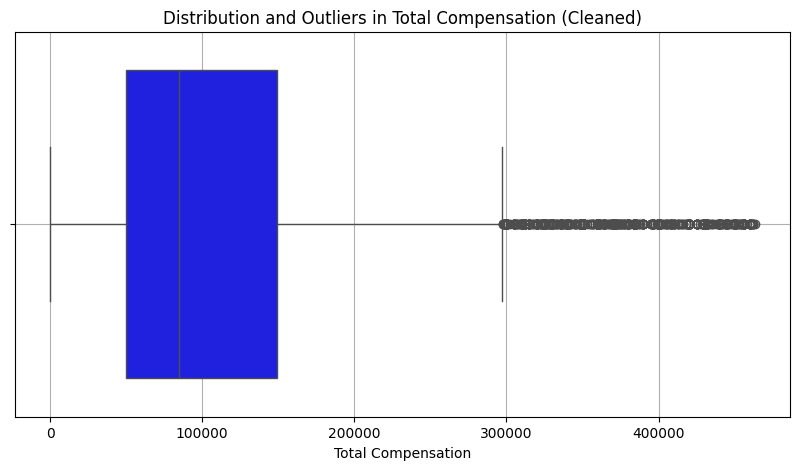

In [17]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # SQL query
# query = "SELECT CompTotal FROM main"

# # Load data
# df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['CompTotal'], color='blue')
plt.xlabel('Total Compensation')
plt.title('Distribution and Outliers in Total Compensation')
plt.grid(True)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


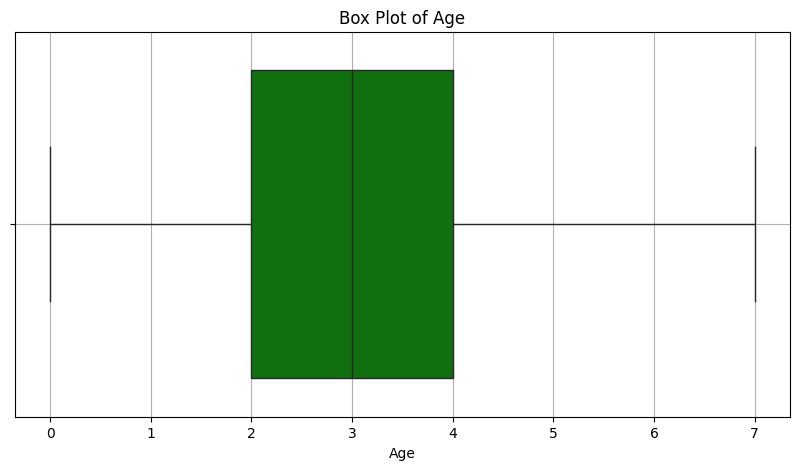

In [23]:
# your code goes here

# # SQL query
query = "SELECT Age FROM main"


# # Load data
df = pd.read_sql(query, conn)

# Define a mapping for each age group to a numeric code
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 0  # Or use np.nan if you want to exclude it
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age_numeric'], color='green')
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.grid(True)
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64


/tmp/ipykernel_300/3629839528.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='CompTotal', data=df, palette='viridis')


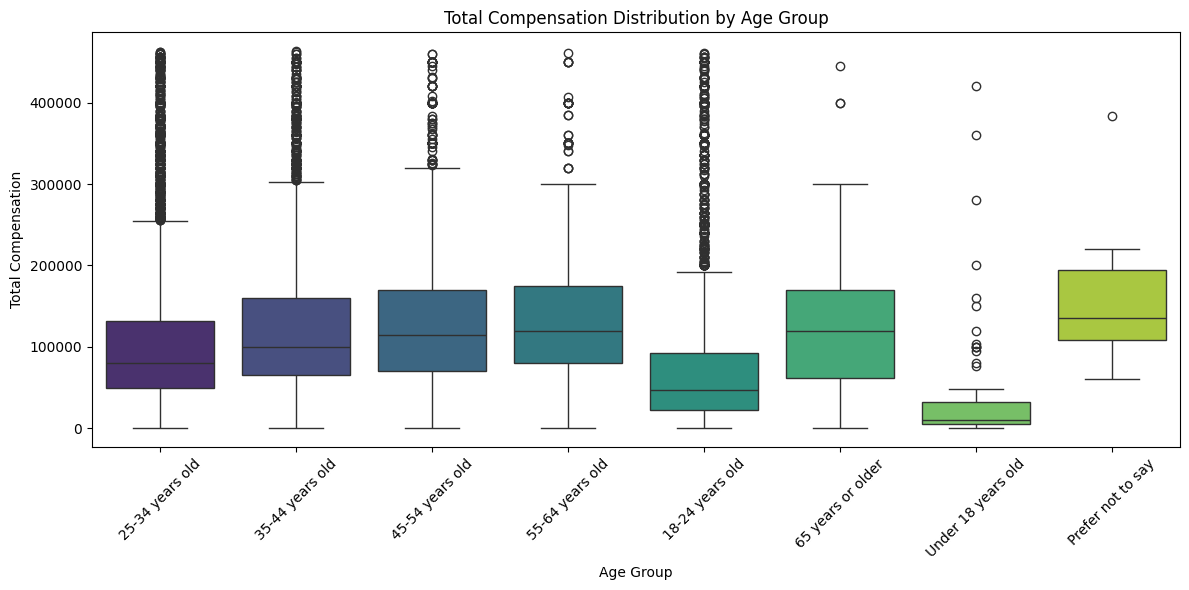

In [30]:
# your code goes here
query = "select CompTotal, Age from main"
df= pd.read_sql(query, conn)

# total compensation column cleansing
print(df['CompTotal'].describe())
print(df['CompTotal'].sort_values(ascending=False).head(10))
df = df[df['CompTotal'] < 1e7]  # Adjust this based on your dataset
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]


plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(x='Age', y='CompTotal', data=df, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Total Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64


/tmp/ipykernel_300/171134210.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='viridis')


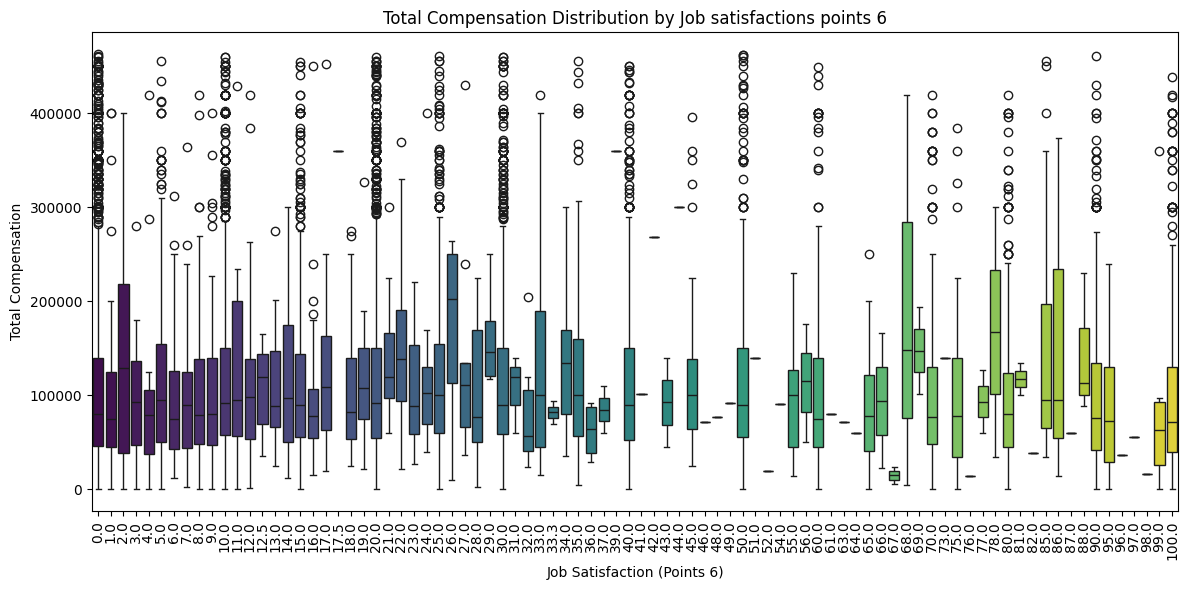

In [44]:
query = "select CompTotal, JobSatPoints_6 from main"
df= pd.read_sql(query, conn)

# total compensation column cleansing
print(df['CompTotal'].describe())
print(df['CompTotal'].sort_values(ascending=False).head(10))
df = df[df['CompTotal'] < 1e7]  # Adjust this based on your dataset
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.sort_values('JobSatPoints_6')

plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Total Compensation Distribution by Job satisfactions points 6')
plt.xlabel('Job Satisfaction (Points 6)')  
plt.ylabel('Total Compensation')

# Show the plot
plt.tight_layout()
plt.show()



### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


count    1.604200e+04
mean     8.100564e+04
std      1.039627e+05
min      1.000000e+00
25%      3.222200e+04
50%      6.444400e+04
75%      1.057060e+05
max      6.340564e+06
Name: ConvertedCompYearly, dtype: float64
10632    6340564.0
11644    3367716.0
14330    2584118.0
20041    2237846.0
20488    2153432.0
8367     2048046.0
21547    1900000.0
8576     1750749.0
19618    1750000.0
9846     1550391.0
Name: ConvertedCompYearly, dtype: float64


/tmp/ipykernel_300/763605596.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df, palette='viridis')


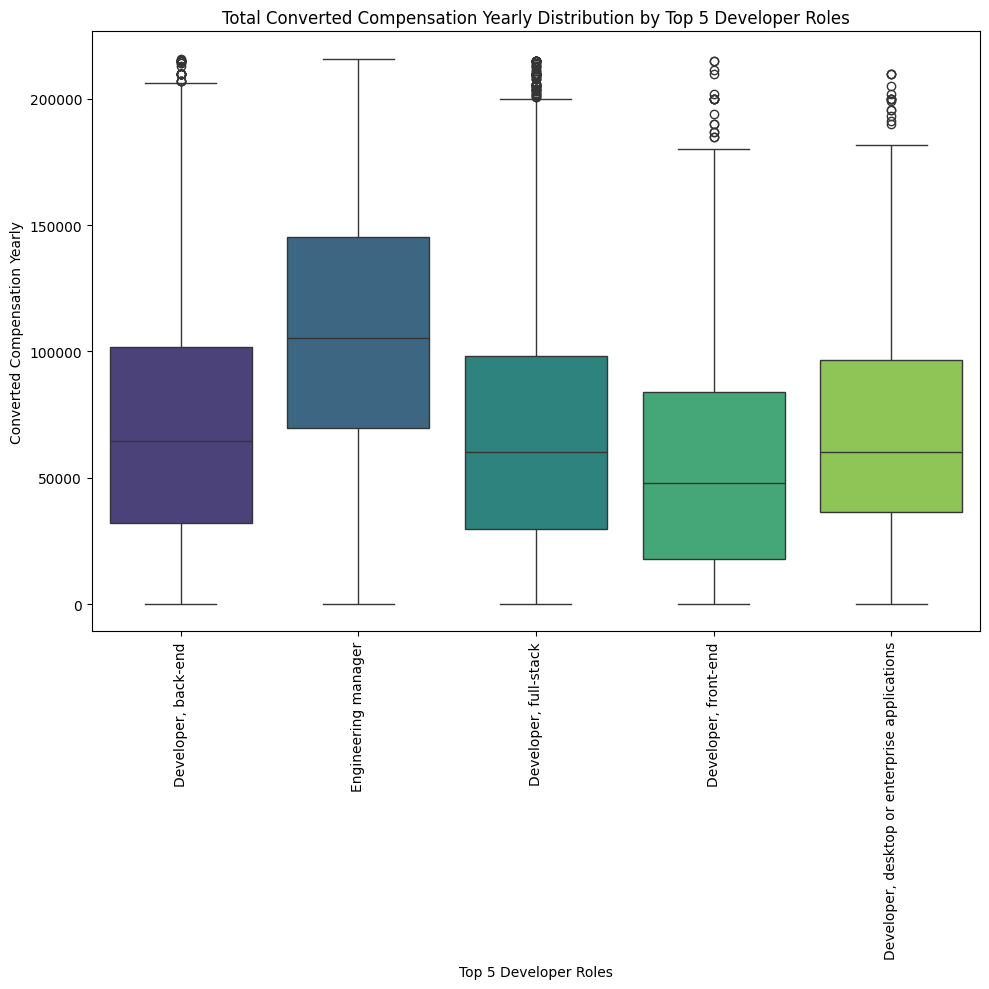

In [53]:
# your code goes here
query = """SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IN (
    SELECT DevType 
    FROM main 
    GROUP BY DevType 
    ORDER BY SUM(ConvertedCompYearly) DESC 
    LIMIT 5
)
"""
df=pd.read_sql(query,conn)
# df.columns.tolist()

print(df['ConvertedCompYearly'].describe())
print(df['ConvertedCompYearly'].sort_values(ascending=False).head(10))
df = df[df['ConvertedCompYearly'] < 1e7]  # Adjust this based on your dataset
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

plt.figure(figsize=(10,10))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Converted Compensation Yearly Distribution by Top 5 Developer Roles')
plt.xlabel('Top 5 Developer Roles')
plt.ylabel('Converted Compensation Yearly')
plt.tight_layout()
plt.show()




**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [81]:
query = """SELECT *
FROM main 
WHERE Country IN (
    SELECT Country 
    FROM main 
    GROUP BY Country 
    ORDER BY SUM(CompTotal) DESC 
    LIMIT 5
)
"""
df=pd.read_sql(query,conn)
df['Employment'].unique()

array(['Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time;Not employed, and not looking for work',
       'Employed, full-time', 'Employed, part-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'I prefer not to say', 'Not employed, but looking for work',
       'Not employed, but looking for work;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, full-time;Employed, part-time',
       'Not employed, and not looking for work',
       'Student, part-time;Employed, part-time', 'Student, part-time',
       'Employed, full-time;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work;Indep

/tmp/ipykernel_300/4255627520.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=df_cleaned, palette='viridis')


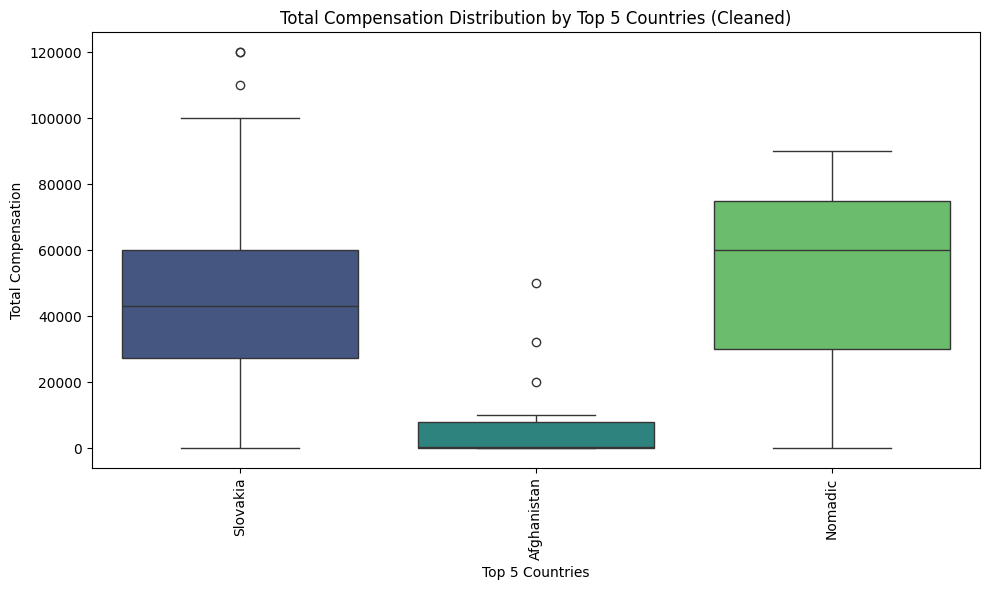

In [77]:

# Query to get top 5 countries by total compensation
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IN (
    SELECT Country
    FROM main
    GROUP BY Country
    ORDER BY SUM(CompTotal) DESC
    LIMIT 5
)
"""
df = pd.read_sql(query, conn)

# Remove unnatural values using the IQR method
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Plot the cleaned boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='CompTotal', data=df_cleaned, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Compensation Distribution by Top 5 Countries (Cleaned)')
plt.xlabel('Top 5 Countries')
plt.ylabel('Total Compensation')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/2444399919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Employment', x='CompTotal', data=df_top, palette='viridis')


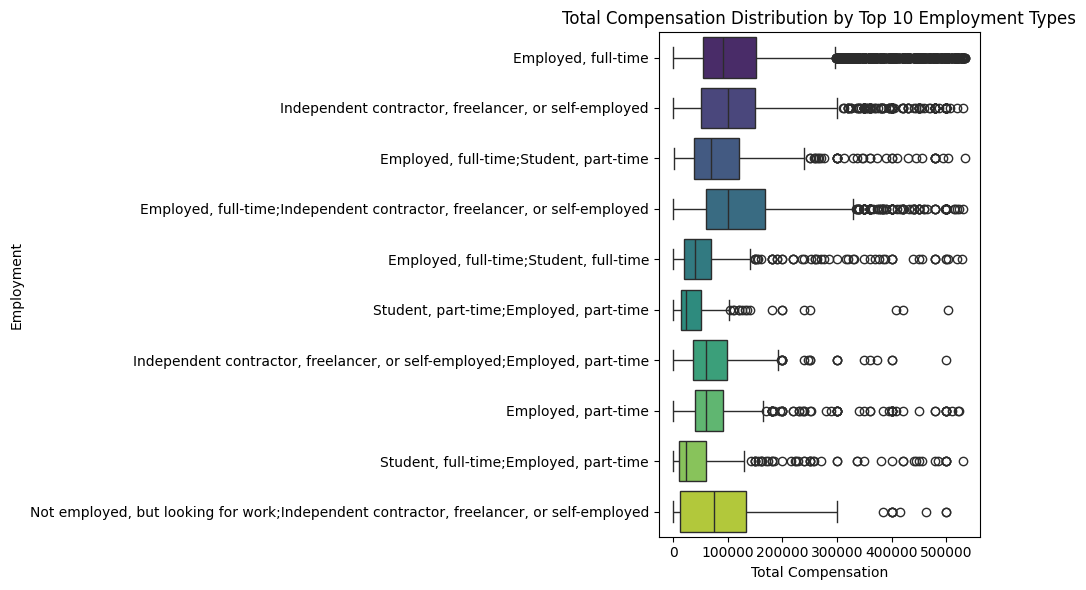

In [86]:
# Query to get Employment and CompTotal
query = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql(query, conn)

# Remove outliers using the IQR method
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Get top 10 Employment categories by count
top_employment = (
    df_cleaned['Employment'].value_counts()
    .head(10)
    .index.tolist()
)

# Filter to those top 10 categories
df_top = df_cleaned[df_cleaned['Employment'].isin(top_employment)]

# Plot the cleaned boxplot (horizontal for clarity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='Employment', x='CompTotal', data=df_top, palette='viridis')
plt.title('Total Compensation Distribution by Top 10 Employment Types')
plt.xlabel('Total Compensation')
plt.ylabel('Employment')
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_300/1119820848.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='YearsCodePro', x='JobSatPoints_6', data=df_cleaned, palette='viridis')


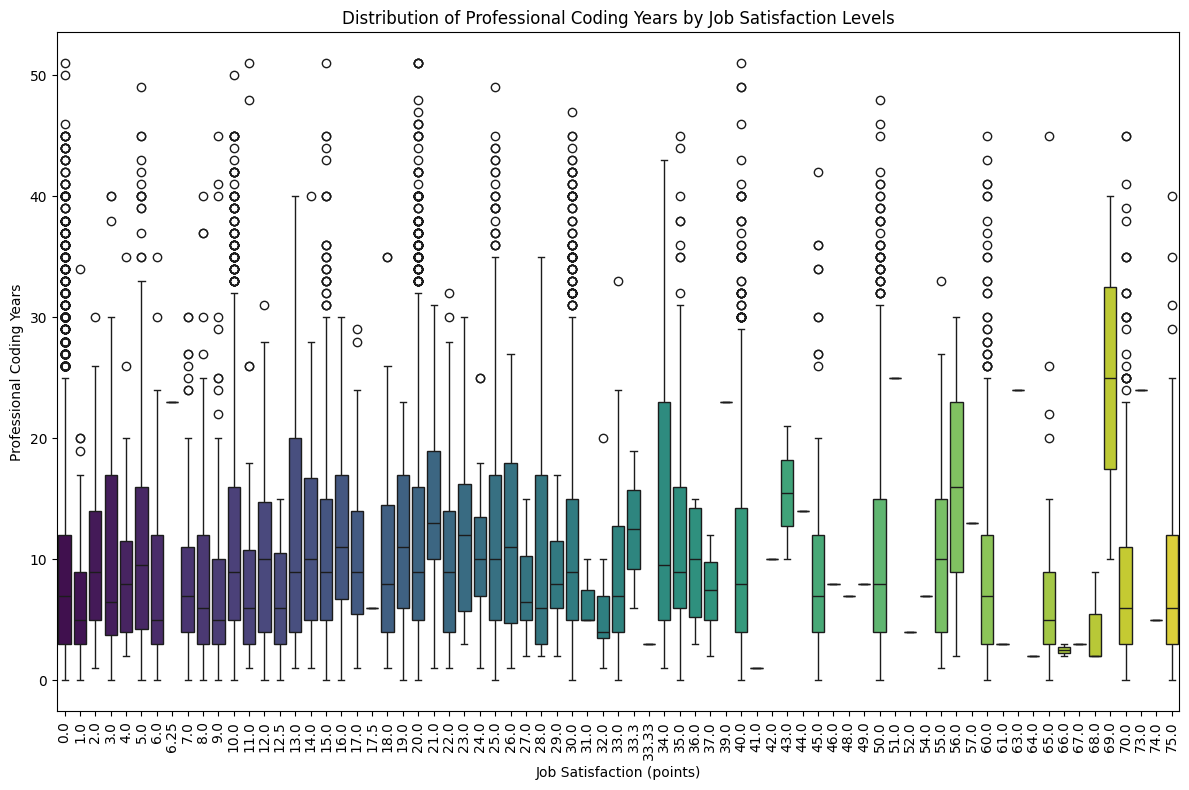

In [90]:
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql(query, conn)

# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Clean and convert YearsCodePro to numeric
def clean_years(value):
    if value == 'Less than 1 year':
        return 0
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)

# Drop rows with missing values in either column
df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'], inplace=True)

# Remove outliers using IQR method
Q1 = df['JobSatPoints_6'].quantile(0.25)
Q3 = df['JobSatPoints_6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['JobSatPoints_6'] >= lower_bound) & (df['JobSatPoints_6'] <= upper_bound)]

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(y='YearsCodePro', x='JobSatPoints_6', data=df_cleaned, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Professional Coding Years by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (points)')
plt.ylabel('Professional Coding Years')
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [91]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
